In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from xml.etree import ElementTree as et
import glob

In [3]:
annot = "C:\\Users\\91911\\Desktop\\hack\\India\\train\\annotations\\xmls"



In [8]:
xml_files = glob.glob(annot + "/*.xml")
len(xml_files)

7706

In [20]:
import xml.etree.ElementTree as ET

data=[]

# Iterate over each XML file
for xml_file in xml_files:
    # Read the contents of the XML file
    with open(xml_file, "r") as file:
        xml_content = file.read()
    
    # Parse the XML content
    root = ET.fromstring(xml_content)
    objects = root.findall('object')
    
    # Initialize counters for object names
    object_counts = {'D00': 0, 'D10': 0, 'D20': 0, 'D40': 0,'other':0}
     # Count the number of objects
    num_objects = len(objects)
        
    # Count the objects with specific names
    for obj in objects:
        name = obj.find('name').text
        if name in object_counts:
            object_counts[name] += 1
        else:
            object_counts['other']+=1
        
        # Append the results to the data list
    data.append({'id': xml_file[-10:-4], 'Num Objects': num_objects, **object_counts})

# Create a DataFrame from the data list
df = pd.DataFrame(data)

# Display the DataFrame
print(df)



          id  Num Objects  D00  D10  D20  D40  other
0     000000            0    0    0    0    0      0
1     000001            0    0    0    0    0      0
2     000002            0    0    0    0    0      0
3     000003            0    0    0    0    0      0
4     000005            1    0    0    0    1      0
...      ...          ...  ...  ...  ...  ...    ...
7701  009887            0    0    0    0    0      0
7702  009888            4    1    0    0    0      3
7703  009889            1    0    0    0    0      1
7704  009890            2    0    0    0    2      0
7705  009891            0    0    0    0    0      0

[7706 rows x 7 columns]


In [22]:
df[df['id']=='000011']

,id,Num Objects,D00,D10,D20,D40,other
7,000011,1,1,0,0,0,0


In [24]:
df.isna().sum()

id             0
Num Objects    0
D00            0
D10            0
D20            0
D40            0
other          0
dtype: int64

In [29]:
x=len(df[df['Num Objects']==0])

Text(0.5, 1.0, 'Distribution of roads in train data')

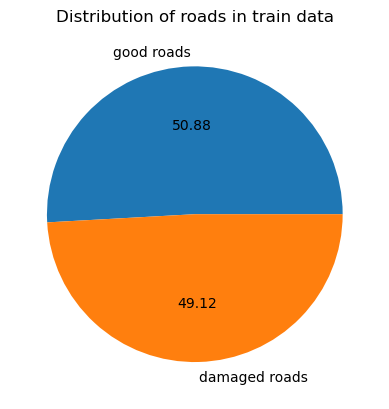

In [38]:
labels = ['good roads', 'damaged roads']
plt.pie([x,7706-x],  labels=labels,  autopct='%0.2f')
plt.title('Distribution of roads in train data')

In [34]:
damaged=df[df['Num Objects']>0]
damaged

,id,Num Objects,D00,D10,D20,D40,other
4,000005,1,0,0,0,1,0
6,000010,1,0,0,0,0,1
7,000011,1,1,0,0,0,0
9,000014,3,0,0,2,0,1
11,000017,5,0,0,0,4,1
...,...,...,...,...,...,...,...
7695,009881,3,0,0,0,3,0
7698,009884,1,1,0,0,0,0
7702,009888,4,1,0,0,0,3
7703,009889,1,0,0,0,0,1


In [48]:
d0=df['D00'].sum()
d1=df['D10'].sum()
d2=df['D20'].sum()
d4=df['D40'].sum()
d5=df['other'].sum()

print(d0,d1,d2,d4,d5)

1555 68 2021 3187 1372


Text(0, 0.5, 'Total number of cracks')

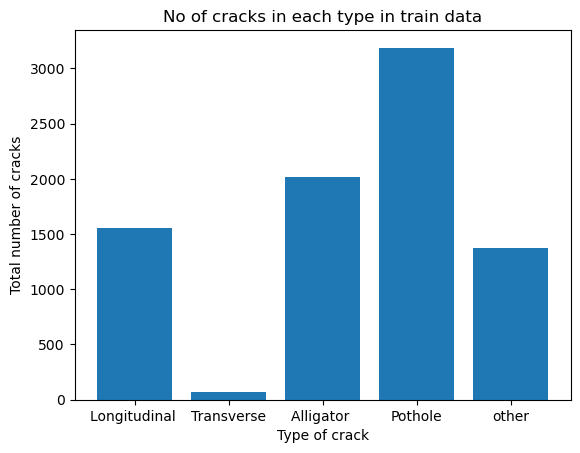

In [47]:
plt.bar(x=['Longitudinal ','Transverse','Alligator ','Pothole','other'],height=[d0,d1,d2,d4,d5])
plt.title('No of cracks in each type in train data')
plt.xlabel('Type of crack')
plt.ylabel('Total number of cracks')

Text(0.5, 1.0, 'percent of cracks in each type in train data')

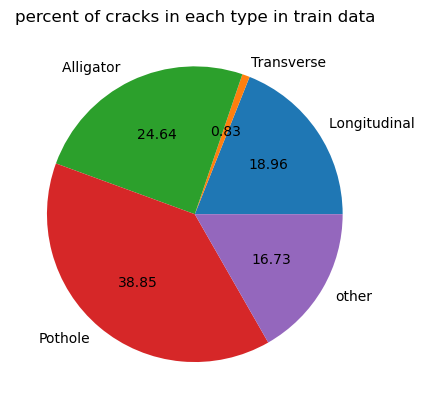

In [50]:
plt.pie([d0,d1,d2,d4,d5],  labels=['Longitudinal ','Transverse','Alligator ','Pothole','other'],  autopct='%0.2f')
plt.title('percent of cracks in each type in train data')

Text(0, 0.5, 'Maximum number of cracks')

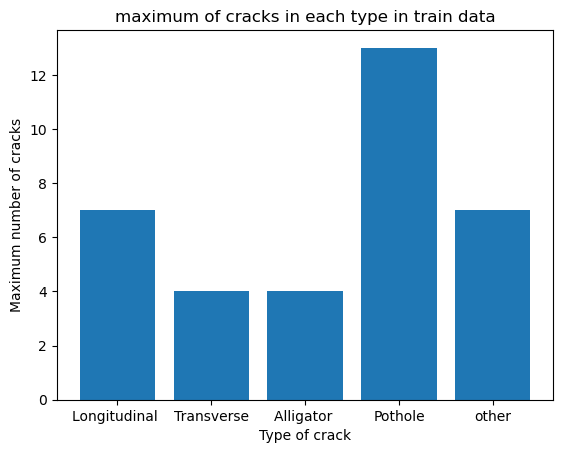

In [51]:
plt.bar(x=['Longitudinal ','Transverse','Alligator ','Pothole','other'],height=[df['D00'].max(),df['D10'].max(),df['D20'].max(),df['D40'].max(),df['other'].max()])
plt.title('maximum of cracks in each type in train data')
plt.xlabel('Type of crack')
plt.ylabel('Maximum number of cracks')

Text(0, 0.5, 'maximum crack')

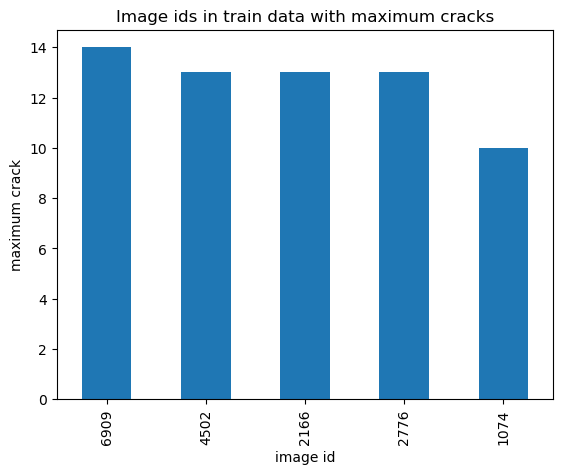

In [61]:
df['Num Objects'].sort_values(ascending=False).head().plot(kind='bar')
plt.title('Image ids in train data with maximum cracks')
plt.xlabel('image id')
plt.ylabel('maximum crack')